In [1]:
import torch
import torch.nn as nn
import torchvision

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='/content/sample_data', train=True,transform=transform, download=True)
testset = torchvision.datasets.CIFAR10(root='/content/sample_data', train=False,transform=transform, download=True)

100%|██████████| 170M/170M [00:04<00:00, 36.3MB/s]


In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
dataiter = iter(testloader)

In [9]:
images, labels = next(dataiter)

In [11]:
images.shape

torch.Size([8, 3, 32, 32])

In [12]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6])

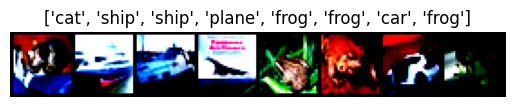

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, label_name):
  img = torchvision.utils.make_grid(img)
  npimg = img.numpy()

  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.title(label_name)
  plt.axis('off')

label_name = [classes[label] for label in labels]
imshow(images, label_name)

Channel last  =

input size = 32 x 32 x 3
n = 32

kernel size =3, number of kernels = 32, padding =1
f= 3 p =1, s= 1

output size = {(n -f +2 p ) / s }+1
|
output size = {(32-3+2)/1}+1 = 32 x 32 x 32

pool size = 2 x 2

output size = 16 x 16 x 32




In [31]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
    self.pool = nn.MaxPool2d((2,2)) # 16 x 16 x 32
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding=1)  # 16 x 16  x 64
    # pool 2 will be used using pool layer ; output size after pooling 2 = 8 x 8 x 64
    self.fc1 = nn.Linear(64 * 8 * 8, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
   x = self.pool(torch.relu(self.conv1(x)))
   x = self.pool(torch.relu(self.conv2(x)))
   x = x.view(-1, 64*8*8)
   x = torch.relu(self.fc1(x))
   x = self.fc2(x)
   return x

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [33]:
model = CNN().to(device)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [94]:
from tqdm.auto import tqdm
def train(model, trainloader, optimizer, criterion):
  model.train()
  print("Training:")
  train_running_loss = 0.0
  train_running_correct = 0
  counter =0

  for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
    counter +=1
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images) # forward pass
    loss = criterion(outputs, labels) # calculate loss
    train_running_loss +=loss.item()
    # print(outputs.data)
    # print(torch.max(outputs.data, 1))
    _, preds = torch.max(outputs.data, 1) # calculate the accuracy
    train_running_correct += (preds == labels).sum().item()

    loss.backward() # backward propagation
    optimizer.step() # weight update process


  epoch_loss = train_running_loss / counter
  epoch_acc = 100. * (train_running_correct/ len(trainloader.dataset))
  return epoch_loss, epoch_acc

In [93]:
import time

epochs = 10

train_loss, train_acc = [], []

for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}, Time:{time.ctime()}")
  train_epoch_loss, train_epoch_acc = train(model, trainloader, optimizer, criterion)
  train_loss.append(train_epoch_loss)
  train_acc.append(train_epoch_acc)
  print(f"Training loss: {train_epoch_loss:.3f},training acc: {train_epoch_acc:.3f}")
  print('----'* 50)
  time.sleep(5)

Epoch 1/10, Time:Mon May 26 10:56:04 2025
Training:


  0%|          | 0/1563 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
         -1.3591e+01, -1.0456e+01, -3.9583e+01,  5.6882e+00,  6.6610e+00],
        [-8.8890e+00, -1.7937e+01,  3.5182e+00, -5.3202e+00,  7.0740e+00,
         -1.7256e+00, -1.1187e+01,  1.9935e+01, -2.5648e+01, -1.5311e+01],
        [-8.1639e+00,  1.2850e+01, -7.3038e+00, -2.1199e+01, -1.5486e+01,
         -2.2537e+01, -3.7899e+00, -2.1904e+01, -4.4664e+00,  7.9791e+00],
        [ 1.3262e+01, -1.1962e+01,  7.7163e-01, -5.6827e+00, -6.4310e+00,
         -1.1681e+01, -1.5508e+01, -2.0552e+01, -3.6230e+00, -1.0364e+00],
        [-4.1547e+00, -1.8288e+01,  1.3736e+01, -3.5166e+00,  3.7128e-01,
          3.2077e+00, -2.9389e+00, -1.2101e+01, -1.3627e+01, -1.8096e+01],
        [ 7.9660e+00, -5.3817e+00,  9.1743e-01, -4.6072e+00, -3.7165e+00,
         -8.3357e+00, -1.0735e+00, -2.2213e+01, -2.5926e-01, -4.9608e+00],
        [-1.5727e+01, -1.7429e+01, -6.0840e+00,  9.3255e+00, -3.5920e+00,
          2.4160e+00,  1.2826e-01, -2.5018e+00, -1.1167

KeyboardInterrupt: 

In [105]:
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=True)

In [101]:
def test(model, testloader, criterion):
  model.eval()
  print("Testing:")
  test_running_loss = 0.0
  test_running_correct = 0
  counter =0
  with torch.no_grad():
    for i, data in tqdm(enumerate(testloader), total=len(testloader)):
      counter +=1
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images) # forward pass
      loss = criterion(outputs, labels) # calculate loss
      test_running_loss +=loss.item()
      _, preds = torch.max(outputs.data, 1) # calculate the accuracy
      test_running_correct += (preds == labels).sum().item()

    epoch_loss = test_running_loss / counter
    epoch_acc = 100. * (test_running_correct/ len(testloader.dataset))
    return epoch_loss, epoch_acc

In [102]:
test_loss, test_acc = test(model, testloader, criterion)

Testing:


  0%|          | 0/1250 [00:00<?, ?it/s]

In [106]:
print("Loss:", test_loss)

Loss: 1.5042966474974644


In [107]:
print("Accuracy:", test_acc)

Accuracy: 71.34


In [108]:
images.shape

torch.Size([8, 3, 32, 32])

In [109]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6])

In [111]:
outputs = model(images.to(device))

In [113]:
_, preds = torch.max(outputs.data, 1)

In [114]:
preds

tensor([3, 8, 0, 0, 6, 6, 1, 6], device='cuda:0')

In [115]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6])